<a href="https://colab.research.google.com/github/akilchen/side-project/blob/Python/Bank_Customer_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0.讀取資料與中文套件**

(1)讀取Kaggle資料集

In [174]:
!pip install -q kaggle

In [175]:
from google.colab import files

uploaded = files.upload()


Saving kaggle.json to kaggle (2).json


In [176]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [177]:
!cp kaggle.json ~/.kaggle/

In [178]:
!chmod 600 ~/.kaggle/kaggle.json

In [179]:
!kaggle datasets list

ref                                                                  title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance                 Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000           3857         64  1.0              
adilshamim8/student-depression-dataset                               Student Depression Dataset                            467020  2025-03-13 03:12:30.423000          21015        336  1.0              
kunalgp/top-1000-most-played-spotify-songs-of-all-time               Top 1000 Most Played Spotify Songs of All Time         53227  2025-04-12 18:13:51.753000           1451         24  0.9

In [180]:
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
License(s): other
bank-customer-churn-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [181]:
!unzip bank-customer-churn-dataset.zip

Archive:  bank-customer-churn-dataset.zip
replace Bank Customer Churn Prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [182]:
import pandas as pd
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(2)下載中文顯示套件

In [183]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-04-24 06:20:08--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.107.139, 142.251.107.100, 142.251.107.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-04-24 06:20:08--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-04-24 06

## 1.認識資料

(1)了解資料基本結構(欄位名稱、資料筆數、資料型態、有無缺失值)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(2) 初步了解資料分布

In [86]:
df.describe()

,customer_id,credit_score,age,tenure,balance,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,199992.480000,1.000000


(3)看是否有重複資料

In [197]:
df.duplicated().sum()

np.int64(0)

## 2. 資料處理

(1) 資料型態轉換

In [198]:
df['active_member'] = df['active_member'].astype('category')
df['credit_card'] = df['credit_card'].astype('category')
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  int64   
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  category
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  int64   
 8   credit_card       10000 non-null  category
 9   active_member     10000 non-null  category
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(4), float64(2), int64(6)
memory usage: 664.7 KB


(2) 將數值資料欄位做分箱處理

In [199]:
import pandas as pd
import numpy as np

# credit_score分箱
bins = [0, 400, 500, 600, 700, 800, 1000]
labels = ['0-400', '401-500', '501-600', '601-700', '701-800', '801+']
df['cscore_grp'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。

# age分箱
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60','61+']
df['age_grp'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# balance分箱
bins = [0, 59999, 109999, 159999, np.inf]
labels = ['0-59K', '60-109K', '110-159K', '160K+']
df['balance_grp'] = pd.cut(df['balance'], bins=bins, labels=labels, right=True) #pd.cut()可以快速將數值欄位轉成分組（分類）欄位。


# estimated_salary分箱
bins = [0, 59999, 109999, 159999, np.inf]
labels = ['0-59K', '60-109K', '110-159K', '160K+']
df['es_grp'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, right=True)

## 3.敘述性統計與交叉分析

#### (1)流失率計算

In [200]:
df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


#### (2)交叉分析

A.性別X流失率

In [201]:
print(pd.crosstab(df['gender'], df['churn']))
print(pd.crosstab(df['gender'], df['churn'], normalize='index'))

churn      0     1
gender            
Female  3404  1139
Male    4559   898
churn          0         1
gender                    
Female  0.749285  0.250715
Male    0.835441  0.164559


這個結果代表不論男性和女性，留住率皆高於流失率，但只看流失率的話，女性的流失率看似高於男性。但是否顯著還是要做假設檢定(卡方檢定)，不能貿然判定。

B.國家X流失

In [202]:
print(pd.crosstab(df['country'], df['churn']))
print(pd.crosstab(df['country'], df['churn'], normalize='index'))

churn       0    1
country           
France   4204  810
Germany  1695  814
Spain    2064  413
churn           0         1
country                    
France   0.838452  0.161548
Germany  0.675568  0.324432
Spain    0.833266  0.166734


C.目前擁有的產品數量X流失

In [203]:
print(pd.crosstab(df['products_number'], df['churn']))
print(pd.crosstab(df['products_number'], df['churn'], normalize='index'))

churn               0     1
products_number            
1                3675  1409
2                4242   348
3                  46   220
4                   0    60
churn                   0         1
products_number                    
1                0.722856  0.277144
2                0.924183  0.075817
3                0.172932  0.827068
4                0.000000  1.000000


D.有無信用卡X流失

In [204]:
print(pd.crosstab(df['credit_card'], df['churn']))
print(pd.crosstab(df['credit_card'], df['churn'], normalize='index'))

churn           0     1
credit_card            
0            2332   613
1            5631  1424
churn               0         1
credit_card                    
0            0.791851  0.208149
1            0.798157  0.201843


E.是否為活躍客戶X流失

In [205]:
print(pd.crosstab(df['active_member'], df['churn']))
print(pd.crosstab(df['active_member'], df['churn'], normalize='index'))

churn             0     1
active_member            
0              3547  1302
1              4416   735
churn                 0         1
active_member                    
0              0.731491  0.268509
1              0.857309  0.142691


### (3)數值變數與流失交叉圖表

A.tenure(往來期間)&churn rate(流失率)交叉分析

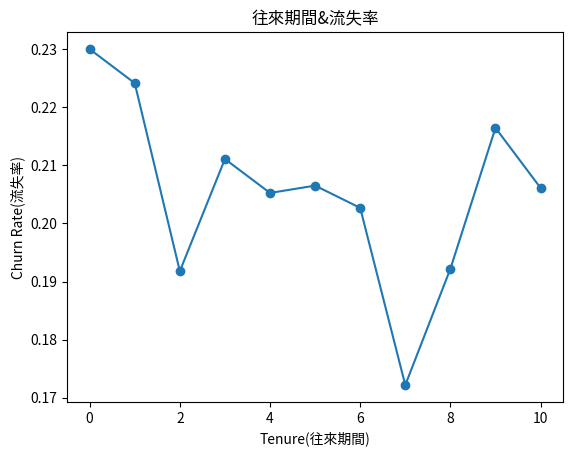

In [206]:
import matplotlib.pyplot as plt

df.groupby('tenure')['churn'].mean().plot(kind='line', marker='o')
plt.title('往來期間&流失率')
plt.xlabel('Tenure(往來期間)')
plt.ylabel('Churn Rate(流失率)')
plt.show()

B.credit_score(信用分數)&churn(流失)

<ipython-input-207-910f1a20efec>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


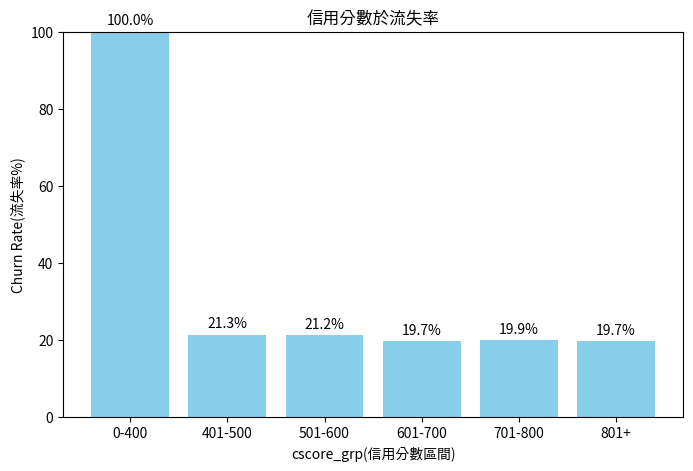

In [207]:
import matplotlib.pyplot as plt

# 計算每個信用分數區間的平均流失率
grouped = df.groupby('cscore_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['cscore_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.2f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('cscore_grp(信用分數區間)')
plt.ylabel('Churn Rate(流失率%)')
plt.title('信用分數於流失率')
plt.ylim(0, 100)
plt.show()

C.age(年齡)&churn(流失)

In [208]:
# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['age_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['age_grp'], df['churn'], normalize='index') * 100

print(ct)
print(ct_percent)

churn       0    1
age_grp           
0-20       84    5
21-30    1736  143
31-40    3913  538
41-50    1532  788
51-60     349  448
61+       349  115
churn            0          1
age_grp                      
0-20     94.382022   5.617978
21-30    92.389569   7.610431
31-40    87.912829  12.087171
41-50    66.034483  33.965517
51-60    43.789210  56.210790
61+      75.215517  24.784483


<ipython-input-209-12aa80220997>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('age_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


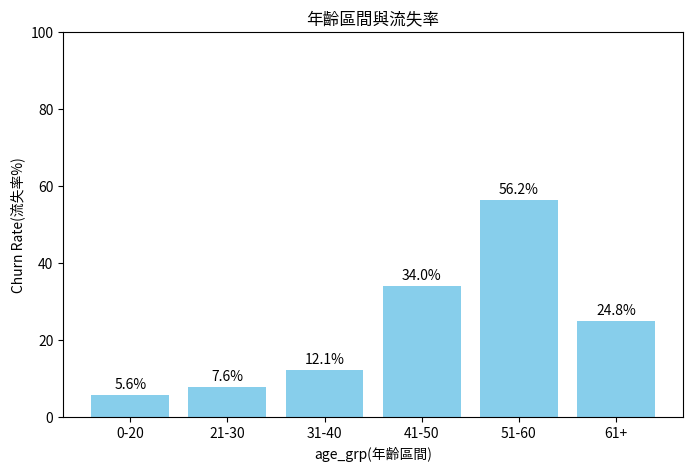

In [209]:
# 計算每個信用分數區間的平均流失率
grouped = df.groupby('age_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['age_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('age_grp(年齡區間)')
plt.ylabel('Churn Rate(流失率%)')
plt.title('年齡區間與流失率')
plt.ylim(0, 100)
plt.show()

D.balance(帳戶餘額)&churn(流失)

<ipython-input-210-9d466029b030>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


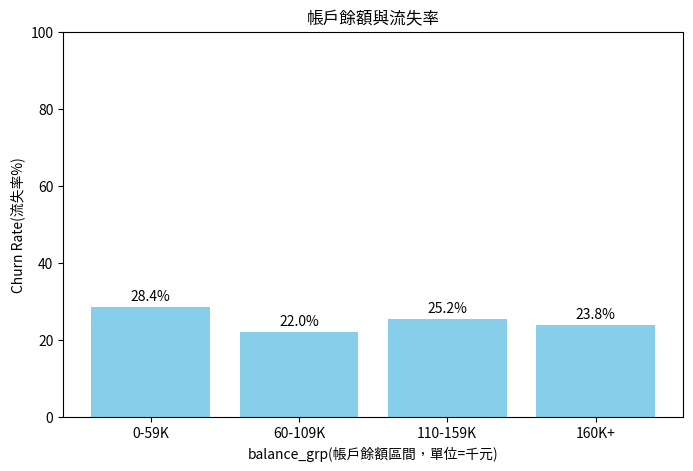

In [210]:
# 計算每個區間的平均流失率
grouped = df.groupby('balance_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['balance_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('balance_grp(帳戶餘額區間，單位=千元)')
plt.ylabel('Churn Rate(流失率%)')
plt.title('帳戶餘額與流失率')
plt.ylim(0, 100)
plt.show()

In [211]:
# 用交叉表查看每組balance的流失與否人數
ct = pd.crosstab(df['balance_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['balance_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn           0    1
balance_grp           
0-59K         111   44
60-109K      1727  488
110-159K     2564  866
160K+         444  139
churn                0          1
balance_grp                      
0-59K        71.612903  28.387097
60-109K      77.968397  22.031603
110-159K     74.752187  25.247813
160K+        76.157804  23.842196


比例比較高的原因在於201+人數比較少

E.estimated_salary(預估年薪)&churn(流失)

In [212]:
# 用交叉表查看每組estimated_salary的流失與否人數
ct = pd.crosstab(df['es_grp'], df['churn'])

# 加上row百分比
ct_percent = pd.crosstab(df['es_grp'], df['churn'], normalize='index') * 100


print(ct)
print(ct_percent)

churn        0    1
es_grp             
0-59K     2376  585
60-109K   2052  513
110-159K  1972  508
160K+     1563  431
churn             0          1
es_grp                        
0-59K     80.243161  19.756839
60-109K   80.000000  20.000000
110-159K  79.516129  20.483871
160K+     78.385155  21.614845


<ipython-input-213-aba9fb527d75>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('es_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。


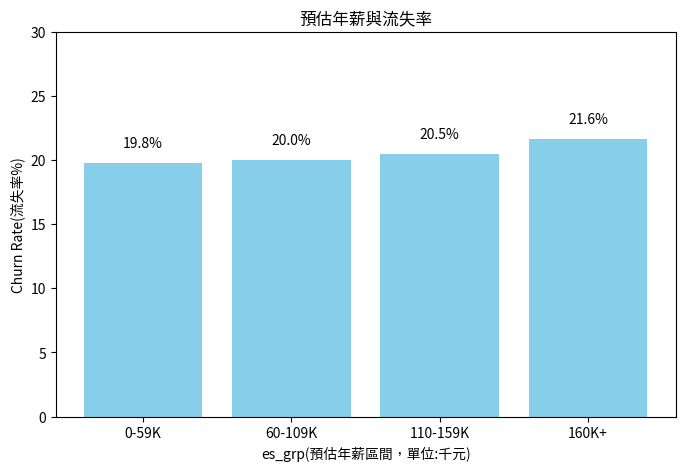

In [213]:
# 計算每個信用分數區間的平均流失率
grouped = df.groupby('es_grp')['churn'].mean().reset_index()  #groupby(...).mean()計算每組的流失率。
grouped['churn'] = grouped['churn'] * 100  # 轉換成百分比

# 畫長條圖
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['es_grp'], grouped['churn'], color='skyblue')
# 顯示每個bar上的數字（%.1f%%）
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xlabel('es_grp(預估年薪區間，單位:千元)')
plt.ylabel('Churn Rate(流失率%)')
plt.title('預估年薪與流失率')
plt.ylim(0, 30)
plt.show()

## 4.模型建置前準備

(1)準備資料

(2)處理類別變數（One-hot encoding）

In [214]:
import statsmodels.api as sm
# 定義自變數和英變數
x = df[['country', 'gender','credit_score', 'balance', 'estimated_salary', 'tenure','age','products_number','credit_card','active_member']]  # 舉例，包含連續變數
y = df['churn']
# 對類別變數做 one-hot encoding
x_encode = pd.get_dummies(x, drop_first=True).astype(int) # drop_first=True 是避免假共線
x_encode = sm.add_constant(x_encode)

x_encode.head()

,const,credit_score,balance,estimated_salary,tenure,age,products_number,country_Germany,country_Spain,gender_Male,credit_card_1,active_member_1
0,1.0,619,0,101348,2,42,1,0,0,0,1,1
1,1.0,608,83807,112542,1,41,1,0,1,0,0,1
2,1.0,502,159660,113931,8,42,3,0,0,0,1,0
3,1.0,699,0,93826,1,39,2,0,0,0,0,0
4,1.0,850,125510,79084,2,43,1,0,1,0,1,1


(3)切分訓練及測試資料

In [215]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encode, y, test_size=0.2, random_state=50)

## 4.模型建立

### (1)Logistic Regression Model

A.建立模型並進行訓練

In [216]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

還沒找到最佳解就超時了，原因是因為資料欄位數值差距過大（EX: balance幾十萬，但products_number只有1~4），而影響模型迭代速度，容易不收斂，因此需要標準化。

B.將資料做標準化後再重建一次模型

In [217]:
from sklearn.preprocessing import StandardScaler
#將資料標準化
scaler = StandardScaler()      #創造一個標準化工具（scaler）的實例，準備用來處理數據
x_scaled = scaler.fit_transform(x_encode)  #標準化

#重新切分資料
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=50)

#再從新建一次模
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

C.預測與評估模型

In [232]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 預測
y_pred_lr = lr_model.predict(x_test)
y_prob_lr = lr_model.predict_proba(x_test)[:, 1]

print("Logistic Regression Report:")
print("-----------------------------")
# 準確率&AUC
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# 混淆矩陣
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# 更詳細的報告
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:
-----------------------------
Accuracy: 0.8125
Confusion Matrix:
[[1533   65]
 [ 310   92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1598
           1       0.59      0.23      0.33       402

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.61      2000
weighted avg       0.78      0.81      0.78      2000



D.權重計算 - 相關係數

In [219]:
coef_df = pd.DataFrame({
    'Feature': x_encode.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

             Feature  Coefficient
5                age     0.768569
11   active_member_1    -0.546792
7    country_Germany     0.334134
9        gender_Male    -0.255758
2            balance     0.175858
6    products_number    -0.080407
1       credit_score    -0.079691
4             tenure    -0.060631
3   estimated_salary     0.046140
8      country_Spain     0.042215
10     credit_card_1    -0.011308
0              const     0.000000


E.整體模型解釋力(R-square)

In [220]:
from statsmodels.tools.tools import add_constant
from statsmodels.discrete.discrete_model import Logit
import numpy as np

#選變數（含類別變數與連續變數）
cat_vars = ['country', 'gender','active_member','credit_card']
x_cols = ['country', 'gender','credit_score', 'balance', 'estimated_salary', 'tenure','age','products_number','credit_card','active_member']

#建構特徵資料（含 one-hot encoding）
x = df[x_cols]
x = pd.get_dummies(x, drop_first=True).astype(float)

#加上截距
x_full = add_constant(x)
y = df['churn'].astype(int)

#建立 full model
model = Logit(y, x_full).fit()
ll_full = model.llf

#建立 null model（只有截距）
x_null = add_constant(pd.DataFrame(index=df.index))  # 只有常數
null_model = Logit(y, x_null).fit()
ll_null = null_model.llf

#計算R²
n = len(df)
r2 = (1 - np.exp((ll_null - ll_full) * 2 / n)) / (1 - np.exp(2 * ll_null / n))

print(f"R-square={round(r2, 4)}")

Optimization terminated successfully.
         Current function value: 0.428068
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.505489
         Iterations 5
R-square=0.2255


E.畫出ROC曲線（Logistic Regression）

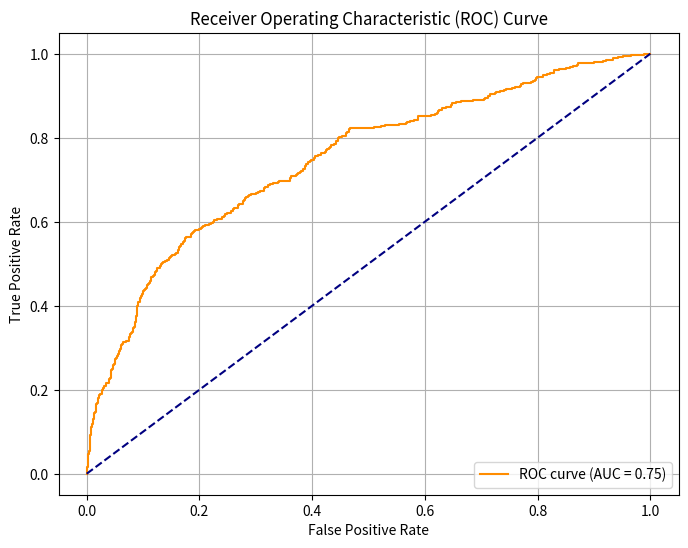

In [221]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#預測機率（不是分類結果）
y_probs = lr_model.predict_proba(x_test)[:, 1]  # 取出屬於流失的機率

#計算fpr和tpr
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

#製作ROC圖表
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### (2)Decision Tree Model

A.預測與評估模型(計算Accruancy、AUC、Confusion Matrix)

In [222]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 建立模型（你可以調 max_depth 看樹多深）
tree_model = DecisionTreeClassifier(max_depth=4, random_state=50)
tree_model.fit(x_train, y_train)

y_pred_dt = tree_model.predict(x_test)
y_prob_dt = tree_model.predict_proba(x_test)[:, 1]

print("Decision tree Report:")
print("-----------------------------")

# 準確率、AUC、混淆矩陣
print("Accruancy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

#更詳細的報告
print("Decision tree Report:")
print(classification_report(y_test, y_pred_dt))

Decision tree Report:
-----------------------------
Accruancy: 0.848
Confusion Matrix:
 [[1559   39]
 [ 265  137]]
Decision tree Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1598
           1       0.78      0.34      0.47       402

    accuracy                           0.85      2000
   macro avg       0.82      0.66      0.69      2000
weighted avg       0.84      0.85      0.82      2000



B.視覺化 Decision Tree

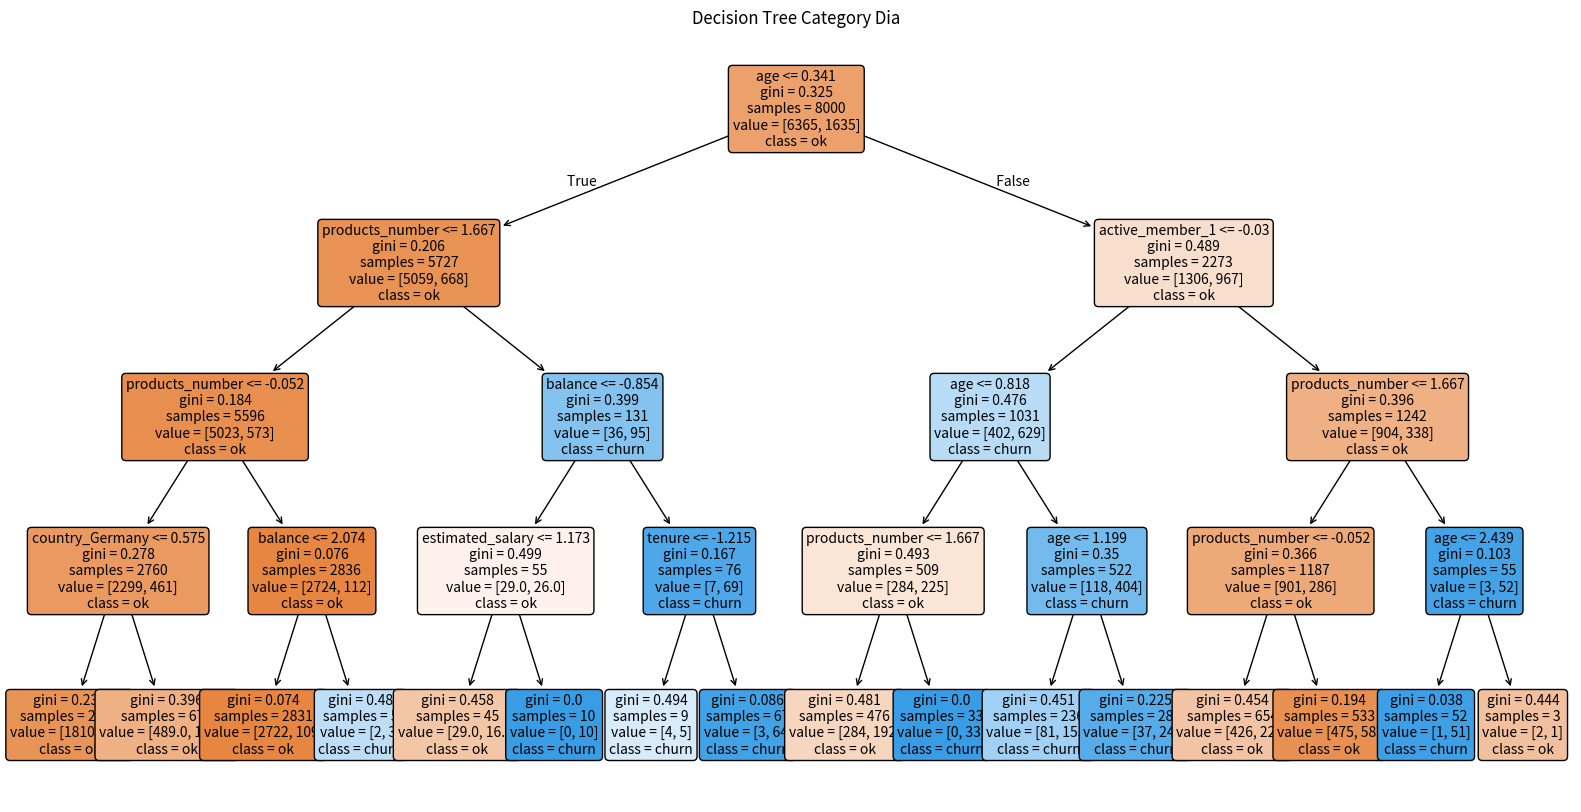

In [223]:
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=x_encode.columns, class_names=["ok", "churn"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Category Dia")
plt.show()

country_Germany <= 0.575，意思為「非德國地區」的客戶較不容易流失

C.將原已標準化之特徵還原

In [224]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 假設你有原始資料（未標準化）
df_raw = df.copy()

# 你訓練模型時標準化的變數欄位
feature_columns = ['age', 'balance', 'estimated_salary', 'tenure', 'products_number']

# 初始化 scaler 並擬合原始資料
scaler = StandardScaler()
scaler.fit(df_raw[feature_columns])

# 示範：你想還原的某些標準化值（例如從決策樹節點看到的）
example_scaled_values = {
    'age': 0.818,
    'balance': -0.854,
    'estimated_salary': 1.173,
    'tenure': -1.215,
    'products_number': 1.667,
}


# 把它們放進 DataFrame 來做還原
scaled_df = pd.DataFrame([example_scaled_values])

# 還原成原始值
recovered_values = scaler.inverse_transform(scaled_df)
recovered_df = pd.DataFrame(recovered_values, columns=feature_columns)

print(recovered_df.T)

                              0
age                   47.500397
balance            23201.169681
estimated_salary  167546.674881
tenure                 1.498984
products_number        2.499769


D.特徵重要性分析

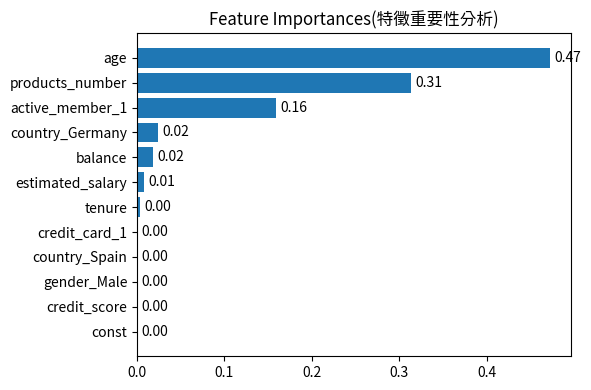

In [225]:
importances = tree_model.feature_importances_
feature_names = x_encode.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
bars = plt.barh(feat_imp.index, feat_imp.values)
plt.title('Feature Importances(特徵重要性分析)')

# 加上每個bar對應的數值（保留2位小數）
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005,                #x位置略往右
             bar.get_y() + bar.get_height()/2,  #y位置置中
             f'{width:.2f}',            #格式化數值
             va='center')

plt.tight_layout()
plt.show()

### (3)Random Forest Model

A.預測與評估模型(計算Accruancy、AUC、Confusion Matrix)

In [253]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=50)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
y_prob_rf = rf_model.predict_proba(x_test)[:, 1]

print("Random Forest Report:")
print("-----------------------------")

# 準確率、AUC、Confusion Matrix
print("Accruancy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#更詳細的報告
print("Decision tree Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:
-----------------------------
Accruancy: 0.8555
Confusion Matrix:
 [[1536   62]
 [ 227  175]]
Decision tree Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1598
           1       0.74      0.44      0.55       402

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.86      0.84      2000



B.特徵重要性分析

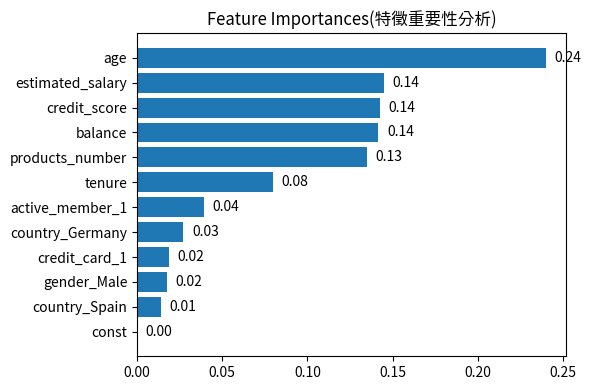

In [227]:
importances = rf_model.feature_importances_
feature_names = x_encode.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
bars = plt.barh(feat_imp.index, feat_imp.values)
plt.title('Feature Importances(特徵重要性分析)')

# 加上每個bar對應的數值（保留2位小數）
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005,                #x位置略往右
             bar.get_y() + bar.get_height()/2,  #y位置置中
             f'{width:.2f}',            #格式化數值
             va='center')

plt.tight_layout()
plt.show()

### (4)Naive Bayes

A.預測與評估模型(計算Accruancy、AUC、Confusion Matrix)

In [228]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

y_pred_nb = nb_model.predict(x_test)
y_prob_nb = nb_model.predict_proba(x_test)[:, 1]

print("Naive Bayes Report:")
print("-----------------------------")

print("Accruancy:", accuracy_score(y_test, y_pred_nb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_nb))

print("Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report:
-----------------------------
Accruancy: 0.831
Confusion matrix:
 [[1510   88]
 [ 250  152]]
Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1598
           1       0.63      0.38      0.47       402

    accuracy                           0.83      2000
   macro avg       0.75      0.66      0.69      2000
weighted avg       0.81      0.83      0.81      2000



### (5)XGboost方法

A.安裝XGBoost

In [229]:
!pip install xgboost

B.預測與評估模型(計算Accruancy、AUC、Confusion Matrix)

In [230]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
y_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

print("XGBoost Report:")
print("-----------------------------")

print("Accruancy:", accuracy_score(y_test, y_pred_xgb))
print("Confuse Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

print("Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Report:
-----------------------------
Accruancy: 0.843
Confuse Matrix:
 [[1492  106]
 [ 208  194]]
Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1598
           1       0.65      0.48      0.55       402

    accuracy                           0.84      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.83      0.84      0.83      2000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:31:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


c.特徵重要性分析

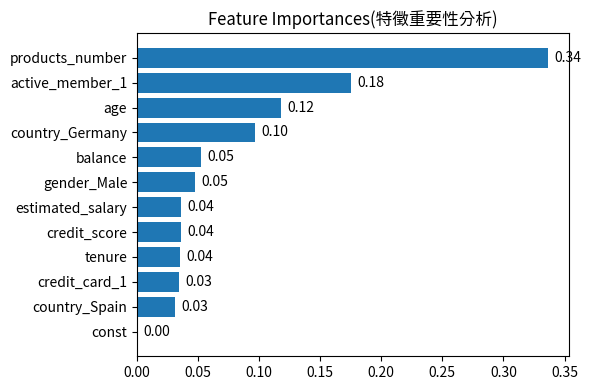

In [231]:
importances = xgb_model.feature_importances_
feature_names = x_encode.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
bars = plt.barh(feat_imp.index, feat_imp.values)
plt.title('Feature Importances(特徵重要性分析)')

# 加上每個bar對應的數值（保留2位小數）
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005,                #x位置略往右
             bar.get_y() + bar.get_height()/2,  #y位置置中
             f'{width:.2f}',            #格式化數值
             va='center')

plt.tight_layout()
plt.show()

## 5.交叉驗證Cross-Validation

In [233]:
from sklearn.model_selection import cross_val_score

lr_model = LogisticRegression(solver='saga', max_iter=10000)
lr_scores = cross_val_score(lr_model, x_encode, y, cv=5, scoring='accuracy')
print("Logistic Regression 平均準確率：", lr_scores.mean())

Logistic Regression 平均準確率： 0.7963


In [234]:
dt_model = DecisionTreeClassifier()
dt_scores = cross_val_score(dt_model, x_encode, y, cv=5, scoring='accuracy')
print("Decision Tree 平均準確率：", dt_scores.mean())

Decision Tree 平均準確率： 0.7929


In [235]:
rf_model = RandomForestClassifier()
rf_scores = cross_val_score(rf_model, x_encode, y, cv=5, scoring='accuracy')
print("Randon Forest 平均準確率：", rf_scores.mean())

Randon Forest 平均準確率： 0.8627


In [236]:
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, x_encode, y, cv=5, scoring='accuracy')
print("Naive Bayes 平均準確率：", nb_scores.mean())

Naive Bayes 平均準確率： 0.7847000000000001


In [237]:
xg_model = XGBClassifier()
xg_scores = cross_val_score(xg_model, x_encode, y, cv=5, scoring='accuracy')
print("XGBoost 平均準確率：", xg_scores.mean())

XGBoost 平均準確率： 0.8555999999999999


##### 交叉驗證準確率整理
| 模型名稱             | 測試集 Accuracy | 交叉驗證準確率 |
|----------------------|------------------|------------------|
| Random Forest        | 0.86             | 0.86             |
| Decision Tree        | 0.85             | 0.79             |
| XGBoost              | 0.84             | 0.86             |
| Naive Bayes          | 0.83             | 0.78             |
| Logistic Regression  | 0.81             | 0.86             |

## 5.模型比較(Receiver operating characteristic curve，ROC)

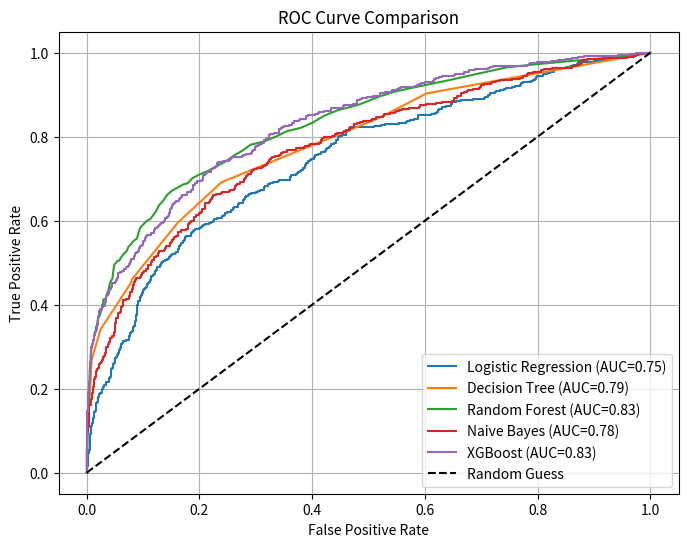

In [238]:
#各模型的AUC分數
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_lr)  # Logistic Regression
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)   # Decision Tree
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)   # Random Forest
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)   # Naive Bayes
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb) # XGBoost

#畫ROC圖
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC=%.2f)' % roc_auc_score(y_test, y_prob_lr))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC=%.2f)' % roc_auc_score(y_test, y_prob_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC=%.2f)' % roc_auc_score(y_test, y_prob_rf))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC=%.2f)' % roc_auc_score(y_test, y_prob_nb))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC=%.2f)' % roc_auc_score(y_test, y_prob_xgb))
plt.plot([0,1], [0,1], 'k--', label='Random Guess')

#定義x軸,y軸
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

將上述取得的的五個模型的Accurancyh.AUC分數比較結果如下

| 模型名稱           | Accuracy | precision | recall   | f1-score | Cross-Validation | AUC |
| -------------------- | -------- | ---------- | --------- | --------- | ----------------| ---- |
| Logistic Regression | 0.81    | 0.78       | 0.81    | 0.78      | 0.80            | 0.75 |
| Decision Tree       | 0.85    | **0.84**   | 0.85    | 0.82      | 0.79            | 0.79 |
| Random Forest       | **0.86** | **0.84**  | **0.86**  | **0.84**   | **0.86**            | **0.83** |
| Naive Bayes         | 0.83    | 0.81       | 0.83    | 0.81      | 0.78            | 0.78 |
| XGBoost             | 0.84    | 0.83       | 0.84    | 0.83      | **0.86**            | **0.83** |


- Precision（精確率）：預測為正例中，有多少是真的正例。
- Recall（召回率）：所有實際為正例中，有多少被正確預測。
- F1-score：精確率與召回率的調和平均數，綜合兩者的指標。
- Support：每個類別在測試資料中出現的樣本數。
- Cross-Validation:交叉驗證，評估模型穩定度指標。
- Area Under the Curve(AUC):曲線以下形成的面積。

依據上表，Random Forest各項指標皆為最高，因此選擇Random Forest為最適合模型。

## 6.儲存pkl

In [254]:
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [255]:
import pickle

with open('rf_model.pkl', 'rb') as file:
    rf_model = pickle.load(file)  # 將訓練好的模型載入到 rf_model


# 現在 rf_model 是已訓練的模型，可以用於預測
y_pred = rf_model.predict(x_test)